# Sussex Budget Productions movie analysis

In this analysis we look into the complexities of Sussex Budget Productions upcoming movie focusing on the profitability, within the constraints of the current budget of 1.5 million GBP.Here I aim to provide valuable insights and recomendations for the 
next project.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind


In [2]:
#Reading the CSV data.
df = pd.read_csv("movie_metadata.csv")

### Cleaning and Wrangling the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

These are some basic details about the dataframe, such as the total number of entries - 5042, the count of non-null values, and the datatype of each column.

#### Creating new columns

In [4]:
#creating new column profit
df['profit']=df['gross']-df['budget']

A new column 'profit' is created in the dataframe to calculate the profit generated by each movie from the existing columns Gross revenue and the Budget of the movie 

#### Remove duplicate values

In [5]:
# Check for the dupliate values, if there are any duplicated values, remove them
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    df.drop_duplicates(keep="first", inplace=True,ignore_index=True)
else:
    print("No duplicates found")

A total of 45 duplicate records were removed from the dataframe

#### Let's find the NAN values present in the dataset.

In [6]:
# checking the null values
df.isnull().sum()

color                          19
director_name                 103
num_critic_for_reviews         49
duration                       15
director_facebook_likes       103
actor_3_facebook_likes         23
actor_2_name                   13
actor_1_facebook_likes          7
gross                         874
genres                          0
actor_1_name                    7
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes       0
actor_3_name                   23
facenumber_in_poster           13
plot_keywords                 152
movie_imdb_link                 0
num_user_for_reviews           21
language                       14
country                         5
content_rating                301
budget                        487
title_year                    107
actor_2_facebook_likes         13
imdb_score                      0
aspect_ratio                  327
movie_facebook_likes            0
profit                       1141
dtype: int64

#### Removing NAN values

In [7]:
# Removing Nan values from budget and gross
df=df.dropna(axis='index',how='any',subset=['budget','gross'])
df.reset_index(drop=True, inplace=True)

I have removed the NAN values from the columns 'Budget' and 'Gross' as these 2 columns have the maximum NAN values and rest of the NAN values are present in the non essential columns that we need to drop.

A total of 1141 records were removed after dropping the NAN values

In [8]:
columns_to_drop = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes',  'actor_1_name',
        'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews',  'country',
       'content_rating', 'actor_2_facebook_likes',
        'aspect_ratio']


In [9]:
# New dataframe df_1 created after dropping the non essential columns, as we do not wish to alter the original dataframe
df_1 = df.drop(columns_to_drop, axis = 1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gross                 3857 non-null   float64
 1   genres                3857 non-null   object 
 2   movie_title           3857 non-null   object 
 3   language              3853 non-null   object 
 4   budget                3857 non-null   float64
 5   title_year            3857 non-null   float64
 6   imdb_score            3857 non-null   float64
 7   movie_facebook_likes  3857 non-null   int64  
 8   profit                3857 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 271.3+ KB


#### Datatype conversion

In [10]:
# Convert the data type of the 'title_year' from float to int
df_1["title_year"] = df_1["title_year"].astype(int)

## Exploratory Data Analysis

In [11]:
# provides a statistical summary of the numerical columns
df_1.describe()

,gross,budget,title_year,imdb_score,movie_facebook_likes,profit
count,3.857000e+03,3.857000e+03,3857.000000,3857.000000,3857.000000,3.857000e+03
mean,5.091264e+07,4.520189e+07,2003.068188,6.463806,9081.565725,5.710748e+06
std,6.930377e+07,2.233096e+08,10.005510,1.053697,21267.885011,2.270307e+08
min,1.620000e+02,2.180000e+02,1920.000000,1.600000,0.000000,-1.221330e+10
25%,6.754898e+06,1.000000e+07,1999.000000,5.900000,0.000000,-1.022140e+07
50%,2.782987e+07,2.400000e+07,2005.000000,6.600000,206.000000,8.347120e+05
75%,6.545231e+07,5.000000e+07,2010.000000,7.200000,11000.000000,2.465179e+07
max,7.605058e+08,1.221550e+10,2016.000000,9.300000,349000.000000,5.235058e+08


#### Let us find out the most popular language in the dataset

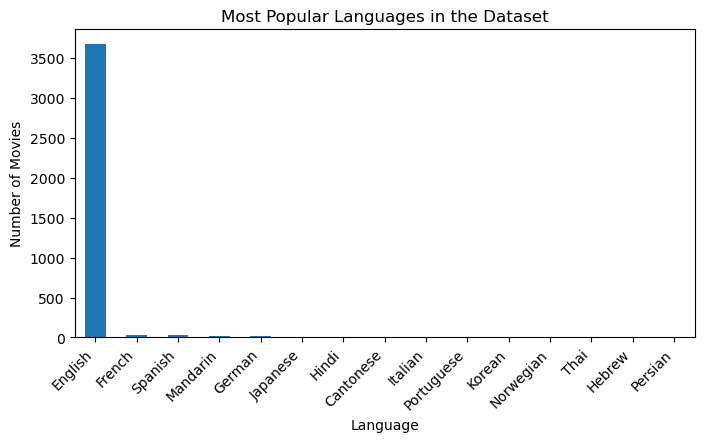

In [12]:
# plotting bar graph
popular_language = df_1['language'].value_counts().nlargest(15)
popular_language.plot(kind='bar', figsize=(8, 4))

plt.title('Most Popular Languages in the Dataset')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# The above bar graph code is referenced from Lecture 3  

As per the above bar chart, we now know the most popular language in the dataset = English

#### Let us find out the most profitable language in the dataset

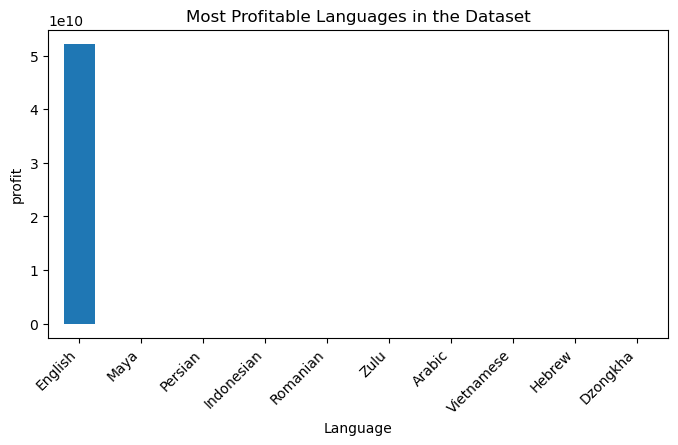

In [13]:
#plotting bar graph
profitable_language = df_1.groupby(by='language')['profit'].sum().nlargest(10)
profitable_language.plot(kind='bar', figsize=(8, 4))

plt.title('Most Profitable Languages in the Dataset')
plt.xlabel('Language')
plt.ylabel('profit')
plt.xticks(rotation=45, ha='right')
plt.show()


As per the above bar chart, we now know that the most profitable language in the dataset is English

Since the most popular and the most profitable language in the dataset is English, we can now filter the dataset with language as English

In [14]:
#Filtering the dataset with language as English
df_1=df_1[(df_1.language =='English') ]

We have removed 183 records that do not have language as English

Analyzing movies over the past few decades can help identify long-term trends, changes in genres and can provide insights into current trends
Since we have the data upto the year 2016, I have decided to concider the data from the year 2000 for further analysis

In [15]:
#Filtering the dataset with title year greater than 2000
df_1=df_1[df_1['title_year'] >= 2000]

We have removed 1016 records of the movies released before the year 2000

let us filters the dataframe to keep only the rows where the profit is greater than zero.This can be useful for analyzing the profitability of the movies.

In [16]:
#filtering the dataset with positive profit
df_1=df_1[df_1['profit'] >= 0]
df_1.reset_index(drop=True, inplace=True)

We have removed 1306 records that do not have any profit

Since we have a designated budget of 1.5 million GBP, let us stick with the given budget 

In [17]:
#filtering dataset with minimum budget
df_1=df_1[df_1['budget']<=1500000]
df_1.reset_index(drop=True, inplace=True)

We have removed 1278 records that are above our current budget

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gross                 74 non-null     float64
 1   genres                74 non-null     object 
 2   movie_title           74 non-null     object 
 3   language              74 non-null     object 
 4   budget                74 non-null     float64
 5   title_year            74 non-null     int32  
 6   imdb_score            74 non-null     float64
 7   movie_facebook_likes  74 non-null     int64  
 8   profit                74 non-null     float64
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 5.0+ KB


#### Let us find the correlation between different data in the dataset

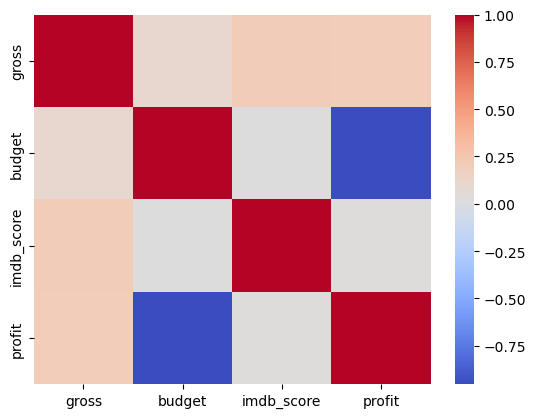

In [19]:
# adding the numerical columns to a new dataframe and finding the correlation between the columns
df_2 = df[['gross', 'budget', 'imdb_score','profit']]
corr = df_2.corr(method="pearson")
sns.heatmap(df_2.corr(),cmap = 'coolwarm')
plt.show()

#The above code was referenced from Lecture 3

We can see profit and Gross are very moderately positive correlated and Budget and profit are very highly negative correlated


<Axes: title={'center': 'Scatter Plot of Gross vs Profit'}, xlabel='gross', ylabel='profit'>

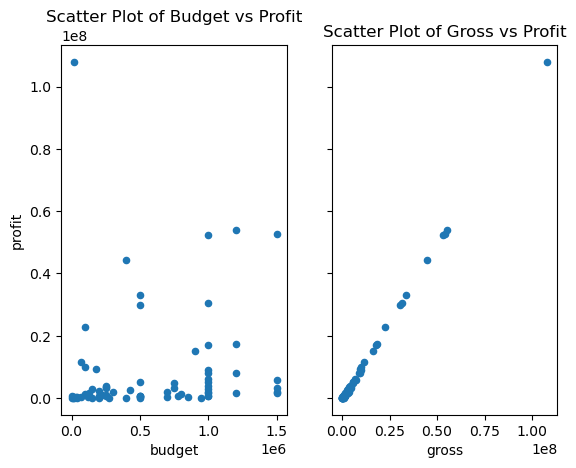

In [20]:
# scatter plot to compare budget with profit and gross with profit

budget_df = df_1[df_1['budget'].notnull()]
gross_df = df_1[df_1['gross'].notnull()]
fig,axes = plt.subplots(nrows = 1, ncols = 2, sharey=True)
budget_df.plot(ax=axes[0],kind="scatter",x="budget",y="profit",title="Scatter Plot of Budget vs Profit")
gross_df.plot(ax=axes[1],kind="scatter",x="gross",y="profit",title="Scatter Plot of Gross vs Profit")

# The above code is referenced from Lab solutions 3

From the above scatter plot we can understand that as the budget increases the profit may not increase and as the gross increases the profit increases

#### Let us find the most profitable Genre in the dataset

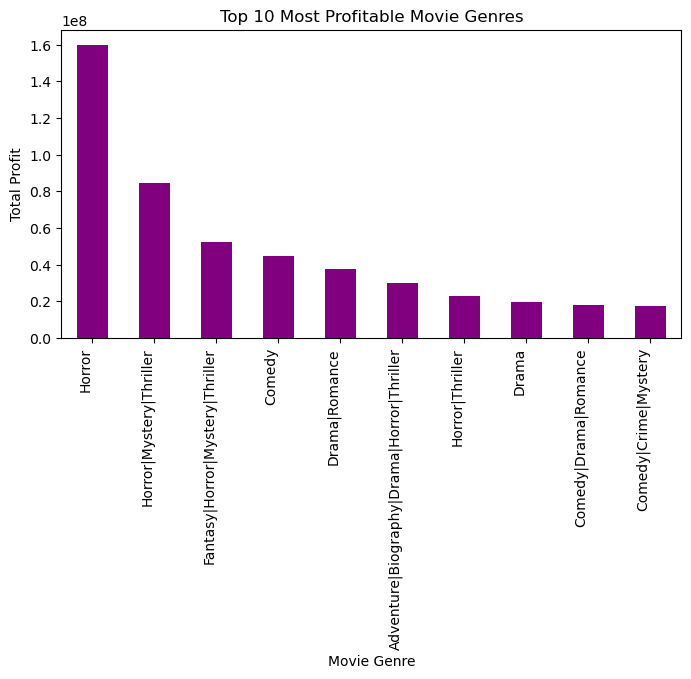

In [21]:
# plot bar graph to find the most profitable genre 
profitable_genres = df_1.groupby('genres')['profit'].sum().nlargest(10)
plt.figure(figsize=(8,4))
profitable_genres.plot(kind='bar', color='purple')
plt.title('Top 10 Most Profitable Movie Genres')
plt.xlabel('Movie Genre')
plt.ylabel('Total Profit')
plt.xticks(rotation=90, ha='right')
plt.show()

From the above bar chart, we know that the most profitable genre is 'Horror'

#### Let us find the most popular Genre in the dataset

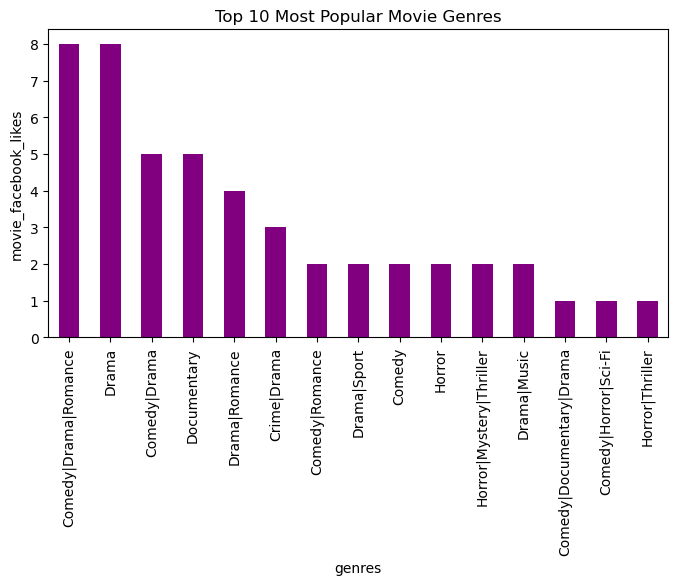

In [22]:
# plot bar graph to find the most popular genre
popular_genres = df_1['genres'].value_counts().nlargest(15)
plt.figure(figsize=(8,4))
popular_genres.plot(kind='bar', color='purple')
plt.title('Top 10 Most Popular Movie Genres')
plt.xlabel('genres')
plt.ylabel('movie_facebook_likes')
plt.xticks(rotation=90)
plt.show()

From the above bar chart, we know that the most popular movie genre are Comedy|Drama|Romance and Drama

Lets create the columns ‘imdb_score_percentage,’ ‘facebook_like_percentage,’ and ‘profit_percentage” to represent the IMDb score percentage, Facebook likes percentage, and profit percentage as a percentage of their respective maximum values.


In [23]:
# creating new columns to calculate the percentage values
df_1['imdb_score_percentage'] = (df_1['imdb_score']/10 )* 100
df_1['facebook_like_percentage'] = (df_1['movie_facebook_likes'] / df_1['movie_facebook_likes'].max()) * 100
df_1['profit_percentage'] = (df_1['profit']/df_1['profit'].max())*100

Lets create a column called "Comparison_score_with_weightage" that calculates a weighted score for each film, with a focus on the profit percentage (70%) and equal weights assigned to the IMDb score and Facebook like percentages (15%).


In [24]:
#creating a new column to calculate the comparison score weightage
df_1.loc[:, 'Comparison_score_with_weightage'] = (df_1['profit_percentage'] * 0.7 +df_1['facebook_like_percentage'] * 0.15 +df_1['imdb_score_percentage'] * 0.15
)

In [25]:
df_1.head(5)

,gross,genres,movie_title,language,budget,title_year,imdb_score,movie_facebook_likes,profit,imdb_score_percentage,facebook_like_percentage,profit_percentage,Comparison_score_with_weightage
0,3123749.0,Comedy|Romance,Boynton Beach Club,English,1500000.0,2005,6.5,88,1623749.0,65.0,0.146667,1.504833,10.825383
1,4599680.0,Drama,Thirteen,English,1500000.0,2003,6.8,0,3099680.0,68.0,0.000000,2.872673,12.210871
2,2957978.0,Biography|Crime|Documentary|History|Thriller,Man on Wire,English,1000000.0,2008,7.8,0,1957978.0,78.0,0.000000,1.814584,12.970209
3,7362100.0,Comedy|Drama,The Squid and the Whale,English,1500000.0,2005,7.4,0,5862100.0,74.0,0.000000,5.432786,14.902950
4,7022940.0,Comedy|Drama|Romance,Kissing Jessica Stein,English,1000000.0,2001,6.7,682,6022940.0,67.0,1.136667,5.581847,14.127793


Let's create a new dataframe df_3, which filters the dataframe df to keep only the 'Comparison_score_with_weightage' greater than or equal to 30 

In [26]:
# creating new df and filtering the weightage >30
df_3 = df_1[df_1['Comparison_score_with_weightage'] >= 30]
df_3.reset_index(drop=True, inplace=True)
df_3.nlargest(10,'Comparison_score_with_weightage')[['genres','Comparison_score_with_weightage']].set_index('genres')


,Comparison_score_with_weightage
genres,
Horror,82.450000
Fantasy|Horror|Mystery|Thriller,59.252844
Horror|Mystery|Thriller,46.551467
Horror,43.193202
Comedy,38.985788
Horror|Mystery|Thriller,31.610632
Drama|Romance,31.126782


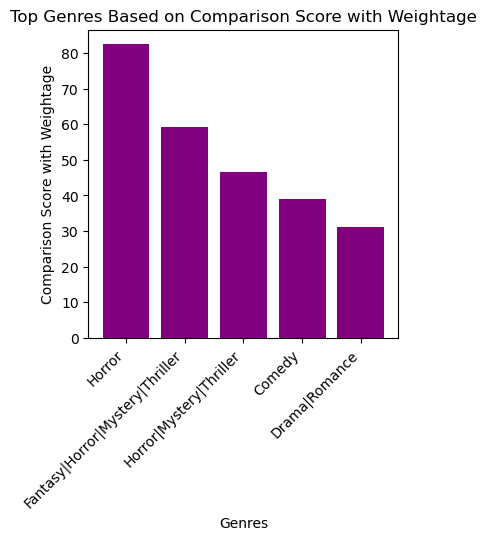

In [27]:
# plotting bar graph to compare each genres with comparison score with weightage
top_gen = df_3.nlargest(10, 'Comparison_score_with_weightage')[['genres', 'Comparison_score_with_weightage']]
plt.figure(figsize=(4, 4))
plt.bar(top_gen['genres'], top_gen['Comparison_score_with_weightage'], color='purple')
plt.title('Top Genres Based on Comparison Score with Weightage')
plt.xlabel('Genres')
plt.ylabel('Comparison Score with Weightage')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [28]:
# finding the avg profit of horror genre and all other genres 
avg_profit_horror = df_1[df_1['genres'] == 'Horror']['profit'].mean()
avg_profit_other= df_1[df_1['genres'] != 'Horror']['profit'].mean()
# finding the difference in mean profits
avg_profit_difference = avg_profit_horror - avg_profit_other
print(f"The average profit difference between Horror and all other genres is: {avg_profit_difference}")

The average profit difference between Horror and all other genres is: 73713535.7361111


## Hypothesis testing

#### Hypothesis Statement

 Null statement(H0): The average profit of horror genre movies is same as the profit of movies from other genres.
 
 Alternative Hypothesis (H1): The average profit of horror genre movies is greater than the average profit of movies from other genres.

#### Data

The profit of horror genre is said to have mean 80073669.0 GBP and a standard deviation of 41457395.9, whilst the profit of all other genre is 6360133.2 with the standard deviation of 11727766.75. 


#### Mathematical formulation:


##### \begin{align*}
\mathbf{H}_0 \quad &: \quad \mu_1 - \mu_2 = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_1 - \mu_2 \gt 0
\end{align*}


In [29]:
# Create a new DataFrame by filtering out movies with the 'horror' genre 
other_df = df_1[df_1['genres'] != 'horror']
# Create a new DataFrame by filtering movies with only the 'horror' genre 
horror_df=df_1[df_1['genres'] == 'Horror']


In [30]:
#calculating mean of profit of horror genre and other genre
mean_1 = horror_df['profit'].mean()
mean_2 = other_df['profit'].mean()


#calculating variance of profit of horror genre and other genre
var_1 = horror_df['profit'].var(ddof=1)  
var_2 = other_df['profit'].var(ddof=1)

#calculating sample size of profit of horror genre and other genre
n_1 = len(horror_df['profit'])
n_2 = len(other_df['profit'])

alpha = 0.05

Depending on the hypothesis statement, we can proceed with the one tail test for the differnce of means.
Since the sample size is not large enough  for the z-test, we can proceed with the t-test

In [31]:
from scipy import stats
#calculating t statistics
t_statistic = (mean_1 - mean_2) / np.sqrt((var_1 / n_1) + (var_2 / n_2))
degrees_of_freedom = int(n_1 + n_2 - 2)
# calculating the p value
p_value = 1 - stats.t.cdf(t_statistic, df=degrees_of_freedom)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


if p_value < alpha:
    print('Reject the Null Hypothesis H0 at {} significance level'.format(alpha))
else:
    print('Failed to reject the Null Hypothesis H0 at {} significance level'.format(alpha))

T-statistic: 2.5705336526395564
P-value: 0.006082071054115623
Reject the Null Hypothesis H0 at 0.05 significance level


In [32]:
# The above Hypothesis testing is referenced from Lab 4 and Lecture 4

From the above Hypothesis we can conclude that since p- value is less than the significance level, hence we can reject the Null hypothesis with a significane level of 0.5 and accept the alternate hypothesis

So From the above Hypothesis it is proved that the profit generated by the 'Horror' genre is greater than the other genres

### Conclusion

The purpose of this analysis was to recommend a film that could make a reasonable profit with a budget of 1.5 million GBP. The analysis is conducted through data cleaning, exploratory data analysis and hypothesis testing.

First, I performed data cleaning and wrangling, removing duplicates and nulls from the dataset, and removing non essential columns and adding necessary columns for further analysis.

During the EDA the top genre with respect to profit with 70% weightage , popularity and IMDB rating with 15% weightage each was figured out. From this 'Horror' movie genre was shortlistted because of its significantly high returns over the budget.

After the hypothesis testing is done and I figured out that I could propose the Horror movie genre at a 90% confidence interval.